In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.ensemble import RandomForestRegressor
import sys
#imports the own created package
import bookie_package as bp

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
#imports pickle file created and saved in 'load_and_clean.ipynb'
df_both_seasons_home = pd.read_pickle('df_both_seasons_essentials')

## Add avg Home Team Goal Difference

In [3]:
# calculates the average home team goal difference across the last 10 hosting games
d_both_seasons = bp.averages.avg_goal_diff(df_both_seasons_home, 'AVGHTGDIFF', 'HomeTeam', 'H')

In [4]:
df_both_seasons = bp.averages.from_dict_value_to_df(d_both_seasons)

In [5]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [6]:
# calculates the average goals shot by the home team across the last 10 hosting games
avg_fthg_per_team=bp.averages.avg_goals(df_both_seasons, 'AVGFTHG', 'HomeTeam', 'H')

In [7]:
df_both_seasons = bp.averages.from_dict_value_to_df(avg_fthg_per_team)

In [8]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [9]:
df_both_seasons.columns

Index(['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST',
       'AST', 'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF', 'AVGFTHG'],
      dtype='object')

In [10]:
df_both_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,2,1,8,6,1,-1,-0.7,1.1
152,22,12,2019,Paderborn,Ein Frankfurt,2,1,5,5,1,-1,-0.4,1.6
145,21,12,2019,Bayern Munich,Wolfsburg,2,0,8,3,2,-2,2.8,3.6
146,21,12,2019,FC Koln,Werder Bremen,1,0,1,1,1,-1,0.0,1.7
147,21,12,2019,Mainz,Leverkusen,0,1,2,4,-1,1,-0.9,1.3


## Add Columns with previous HTGDIFF and HST for each HomeTeam

In [11]:
# HTGDIFF values from the last ten home team games, per past match
team_with_past_HTGDIFF=bp.averages.previous_data(df_both_seasons, 'HomeTeam', 'HTGDIFF')

In [12]:
df_team_with_past_HTGDIFF = bp.averages.from_dict_value_to_df(team_with_past_HTGDIFF)

In [13]:
columns_HTGDIFF = [
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF','AVGFTHG', 'HST', 'AST',  'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
    'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10'
]

In [14]:
df_team_with_past_HTGDIFF = df_team_with_past_HTGDIFF.reindex(columns=columns_HTGDIFF)

In [15]:
df_team_with_past_HTGDIFF.fillna(0, inplace=True)

In [16]:
# HST values from the last ten home team games, per past match
team_with_past_HST=bp.averages.previous_data(df_team_with_past_HTGDIFF, 'HomeTeam', 'HST')

In [17]:
df_team_with_past_HST = bp.averages.from_dict_value_to_df(team_with_past_HST)

In [18]:
columns_HST =  ['HST_1', 'HST_2', 'HST_3', 'HST_4', 'HST_5', 'HST_6', 'HST_7', 'HST_8', 'HST_9', 'HST_10']
columns_HTGDIFF_HST = columns_HTGDIFF + columns_HST

In [19]:

df_team_with_past_HST = df_team_with_past_HST.reindex(columns=columns_HTGDIFF_HST)

In [20]:
df_team_with_past_HST.fillna(0, inplace=True)

In [21]:
# FTHG values from the last ten home team games, per past match
team_with_past_FTHG = bp.averages.previous_data(df_team_with_past_HST, 'HomeTeam', 'FTHG')

In [22]:
df_team_with_past_FTHG = bp.averages.from_dict_value_to_df(team_with_past_FTHG)

In [23]:
columns_FTHG = ['FTHG_1', 'FTHG_2', 'FTHG_3', 'FTHG_4', 'FTHG_5', 'FTHG_6', 'FTHG_7', 'FTHG_8', 'FTHG_9', 'FTHG_10']
columns_HTGDIFF_HST_FTHG = columns_HTGDIFF_HST + columns_FTHG

In [24]:

df_team_with_past_FTHG = df_team_with_past_FTHG.reindex(columns=columns_HTGDIFF_HST_FTHG)

In [25]:
df_team_with_past_FTHG.fillna(0, inplace=True)

In [26]:
df_result = df_team_with_past_FTHG.copy()

In [27]:
df_result.shape

(561, 43)

In [28]:
df_result = df_result.drop(['HomeTeam', 'AwayTeam'], axis = 1)

In [29]:
df_result.head()

,Day,Month,Year,FTHG,FTAG,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG,HST,...,FTHG_1,FTHG_2,FTHG_3,FTHG_4,FTHG_5,FTHG_6,FTHG_7,FTHG_8,FTHG_9,FTHG_10
151,22,12,2019,2,1,1,-1,-0.7,1.1,8,...,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0
132,14,12,2019,0,3,-3,3,-0.5,1.3,1,...,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,1.0
101,23,11,2019,0,4,-4,4,-0.5,1.4,1,...,0.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0
224,3,11,2019,0,3,-3,3,0.1,1.7,3,...,1.0,3.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,2.0
65,19,10,2019,1,0,1,-1,0.6,1.9,4,...,3.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,2.0,2.0


In [30]:
print('Shape of features:', df_result.shape)

Shape of features: (561, 41)


## Features and Labels and Convert Data to Arrays

In [31]:
# Labels are the values we want to predict
labels = np.array(df_result['FTHG'])

# Remove the labels from the features
# axis 1 refers to the columns
df_result= df_result.drop(['FTHG','FTAG', 'HTGDIFF', 'ATGDIFF', 'HST', 'AST', 'HTGDIFF_7', 'HTGDIFF_9', 'HTGDIFF_10', 'FTHG_5', 'FTHG_8', 'FTHG_10', 'FTHG_4', 'FTHG_7', 'HST_6', 'FTHG_3', 'FTHG_7', 'FTHG_3'], axis = 1)

# Saving feature names for later use
feature_list = list(df_result.columns)

# Convert to numpy array
df_result = np.array(df_result)

## Training and Testing Sets

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    df_result, labels, test_size = 0.25,random_state = 42
)
                

In [33]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (420, 25)
Training Labels Shape: (420,)
Testing Features Shape: (141, 25)
Testing Labels Shape: (141,)


## Establish Baseline

In [34]:
# The baseline predictions are the historical averages
baseline_preds = train_features[:, feature_list.index('AVGFTHG')]
# AVerage goals made by home team

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - train_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'Goals.')

Average baseline error:  1.33 Goals.


## Train Model

In [35]:
rf = bp.prediction.random_forrest(train_features, train_labels, n_estimators=1000,random_state = 42)

## Make Predictions on Test Data

In [36]:
bp.prediction.performance_accuracy(test_labels,test_features, rf)

Mean Absolute Error: 1.24 Goals.
Accuracy: 21.28 %.


In [37]:
features=df_result
predictions_FTHG = rf.predict(features)
next_games_predictions=np.round(predictions_FTHG,0)

In [38]:
df_both_seasons['FTHG'] = next_games_predictions
df_both_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,1.0,1,8,6,1,-1,-0.7,1.1
152,22,12,2019,Paderborn,Ein Frankfurt,0.0,1,5,5,1,-1,-0.4,1.6
145,21,12,2019,Bayern Munich,Wolfsburg,2.0,0,8,3,2,-2,2.8,3.6
146,21,12,2019,FC Koln,Werder Bremen,1.0,0,1,1,1,-1,0.0,1.7
147,21,12,2019,Mainz,Leverkusen,1.0,1,2,4,-1,1,-0.9,1.3


### Visualizing a Single Decision Tree

In [39]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[10]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[10]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_home.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_home.dot')
# Write graph to a png file
graph.write_png('tree_home.png')

In [40]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 18


In [41]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 4, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_home.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_home.dot')

graph.write_png('small_tree_home.png');

### Variable Importances

In [42]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVGFTHG              Importance: 0.14204
Variable: Day                  Importance: 0.07401
Variable: HST_1                Importance: 0.06348
Variable: AVGHTGDIFF           Importance: 0.04845
Variable: Month                Importance: 0.04722
Variable: HST_3                Importance: 0.04418
Variable: HTGDIFF_6            Importance: 0.04364
Variable: HTGDIFF_3            Importance: 0.04178
Variable: FTHG_1               Importance: 0.04093
Variable: HTGDIFF_1            Importance: 0.04066
Variable: HST_2                Importance: 0.0395
Variable: HTGDIFF_2            Importance: 0.03472
Variable: HTGDIFF_8            Importance: 0.03461
Variable: HST_5                Importance: 0.03314
Variable: HST_4                Importance: 0.032
Variable: HST_8                Importance: 0.0312
Variable: HTGDIFF_4            Importance: 0.02989
Variable: HST_9                Importance: 0.02674
Variable: HST_7                Importance: 0.02548
Variable: HTGDIFF_5            Impo

## Feature Reduction

In [43]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

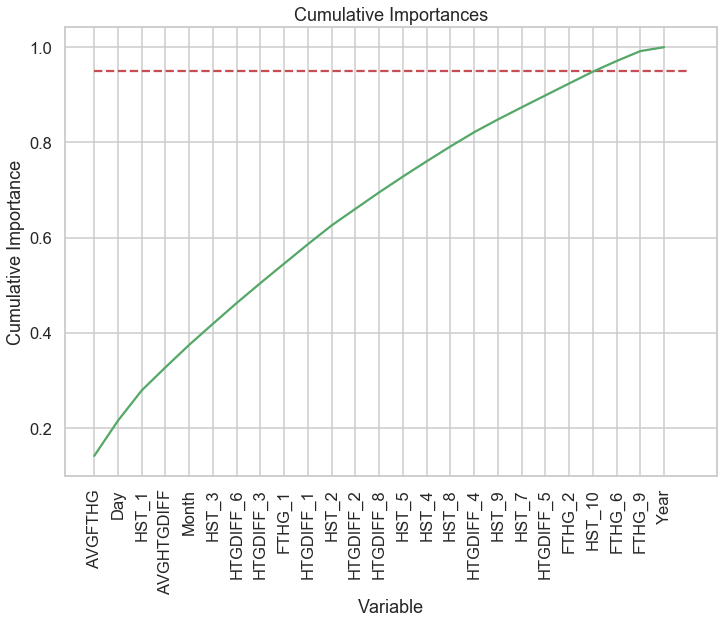

In [44]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(list(range(len(importances))), cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(list(range(len(importances))), sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [45]:
# Dates of training values
predictions=rf.predict(test_features)
months = df_result[:, feature_list.index('Month')]
days = df_result[:, feature_list.index('Day')]
years = df_result[:, feature_list.index('Year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

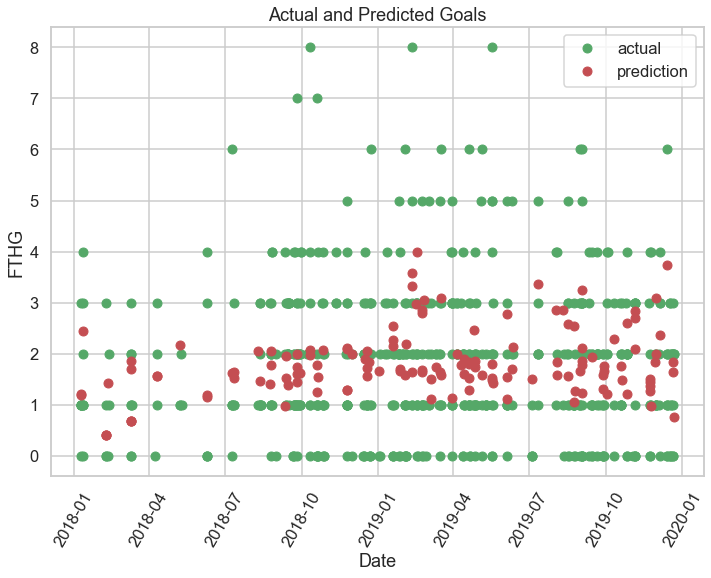

In [46]:
plt.plot(true_data['date'], true_data['actual'], 'go', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('FTHG'); plt.title('Actual and Predicted Goals');

## Random Forest Optimization through Random Search

In [47]:
rs = bp.prediction.random_search(train_features,train_labels,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.8s finished


In [48]:
best_params = rs.best_params_

In [49]:
best_params

{'n_estimators': 434,
 'min_samples_split': 10,
 'max_leaf_nodes': 19,
 'max_features': 0.6,
 'max_depth': 5,
 'bootstrap': False}

In [50]:
# reuses newly calculated params
rf = bp.prediction.random_forrest(
    train_features, train_labels, 
    n_estimators=best_params['n_estimators'],
    random_state = 42,
    min_samples_split = best_params['min_samples_split'],
    max_leaf_nodes = best_params['max_leaf_nodes'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'],
    bootstrap = best_params['bootstrap']
)


In [51]:
# recalculates new Mean Absolute Error and accuracy
bp.prediction.performance_accuracy(test_labels,test_features, rf)

Mean Absolute Error: 1.24 Goals.
Accuracy: 24.82 %.


In [52]:
next_games=df_result
# predicts new results with newly calculated params
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [53]:
df_both_seasons['FTHG'] = next_games_predictions
df_both_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,1.0,1,8,6,1,-1,-0.7,1.1
152,22,12,2019,Paderborn,Ein Frankfurt,0.0,1,5,5,1,-1,-0.4,1.6
145,21,12,2019,Bayern Munich,Wolfsburg,1.0,0,8,3,2,-2,2.8,3.6
146,21,12,2019,FC Koln,Werder Bremen,1.0,0,1,1,1,-1,0.0,1.7
147,21,12,2019,Mainz,Leverkusen,2.0,1,2,4,-1,1,-0.9,1.3


In [54]:
df_both_seasons.to_excel('df_both_seasons_home.xlsx')